# Consumer Behavior Analytics - Best Model & Interpretability

**Libraries and imports**

In [14]:
# Basic DS libraries
import pandas as pd
import numpy as np

# DataViz libraries
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import shap
shap.initjs()

# Statistics Libraries
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# Data Utils
from sklearn.metrics import classification_report, confusion_matrix, f1_score, \
                                                                     recall_score, \
                                                                     precision_score, \
                                                                     accuracy_score, \
                                                                     roc_auc_score, \
                                                                     auc, \
                                                                     plot_confusion_matrix, \
                                                                     plot_roc_curve
                                                                         

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier 
from xgboost import XGBClassifier

import joblib
import pickle

# Notebook setup
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

**Let's recover the datasets**

In [15]:
# Loading X_train datasets
X_train = pd.read_csv('../data/tests_sets/X_train-customers_exposed.csv') 
X_train_scaled = pd.read_csv('../data/tests_sets/X_train_scaled-customers_exposed.csv')
y_train = pd.read_csv('../data/tests_sets/y_train-customers_exposed.csv')

# Loading X_val datasets
X_val = pd.read_csv('../data/tests_sets/X_val-customers_exposed.csv')
X_val_scaled = pd.read_csv('../data/tests_sets/X_val_scaled-customers_exposed.csv')
y_val = pd.read_csv('../data/tests_sets/y_val-customers_exposed.csv')

# Loading X_test datasets
X_test = pd.read_csv('../data/tests_sets/X_test-customers_exposed.csv')
X_test_scaled = pd.read_csv('../data/tests_sets/X_test_scaled-customers_exposed.csv')
y_test = pd.read_csv('../data/tests_sets/y_test-customers_exposed.csv')

In [17]:
X_train_scaled.describe()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Family_Size,Income_PerCap,Total_Spent,Prop_Spending_Income_pc,Total_Puchases,Avg_Ticket,Age,Dt_Customer_InDays,Lives_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
count,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000
mean,0.552133,-0.003626,0.003124,0.003506,-0.003557,0.002583,0.383671,0.322374,0.410673,0.422851,0.383595,0.597156,0.006330,0.002362,0.002774,-0.207938,0.002370,0.350711,0.233426,-0.006551,0.097814,0.005900,0.126506,0.002754,0.004105,0.003690,0.099526,0.334123,0.232227,0.236967,0.042654
std,0.967836,1.002164,1.002523,1.002255,1.001658,1.001852,0.994852,0.664575,0.904664,0.970794,0.980625,0.945695,0.998504,1.001205,1.000079,0.656940,0.048679,0.945165,0.863789,0.998748,0.685452,0.996677,0.652456,1.002605,1.000700,1.002114,0.299722,0.472243,0.422755,0.425726,0.202316
min,-2.000000,-2.575812,-0.659232,-0.739719,-1.572317,-1.270170,-0.386364,-0.304108,-0.293040,-0.324324,-0.614035,-0.500000,-1.529121,-1.360240,-1.947411,-1.250000,0.000000,-1.000000,-0.937392,-1.371228,-0.927967,-2.257684,-0.782407,-2.333413,-1.591737,-0.778499,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-0.849568,-0.659232,-0.739719,-0.844293,-0.929106,-0.318182,-0.219497,-0.249084,-0.281081,-0.280702,0.000000,-0.754975,-1.015505,-0.736704,-0.750000,0.000000,0.000000,-0.458632,-0.999403,-0.433873,-0.666112,-0.458915,-0.664440,-0.872151,-0.778499,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.114218,-0.659232,-0.739719,-0.116268,-0.081669,0.000000,-0.002452,0.000000,0.000000,0.000000,0.000000,0.019171,0.018700,-0.131350,0.000000,0.000000,0.000000,-0.017555,-0.002533,-0.004959,0.202018,-0.009169,-0.080300,-0.098991,-0.778499,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.807206,1.396020,1.094438,0.819763,0.776830,0.670455,0.778663,0.747253,0.713514,0.719298,1.000000,0.793317,0.708171,0.776680,0.250000,0.000000,1.000000,0.544799,0.808788,0.558107,0.636083,0.538062,0.837635,0.843411,1.284523,0.000000,1.000000,0.000000,0.000000,0.000000
max,2.000000,2.089271,3.451272,2.928596,1.859798,2.394887,4.000000,2.096873,3.413919,3.870270,3.614035,5.000000,2.341609,2.431846,1.987387,3.500000,1.000000,3.000000,2.762925,2.285901,2.832692,2.372343,1.984080,2.256262,1.788249,1.284523,1.000000,1.000000,1.000000,1.000000,1.000000


**And now load the choosen model**

In [161]:
log_model = joblib.load('../models/v2_pkl_cexposed_Logistic_Regression-Baseline.pkl')

# gradboost_model = joblib.load('../models/v2_pkl_cexposed_GradientBoostingClassifier.pkl')
# rf_model = joblib.load('../models/v2_pkl_cexposed_RandomForestClassifier.pkl')
# xgboost_model = joblib.load('../models/v2_pkl_cexposed_XGboostClassifier.pkl')

In [172]:
# Saving y_val_pred into a new variable to compare metrics in classification report
y_val_pred = log_model.predict(X_val_scaled)

# y_val_xgboost_pred = xgboost_model.predict(X_val)

In [171]:
# Viewing classification report
# print(classification_report(y_val, y_val_pred)) # Uncomment for print

## Feature Importance Analysis

More than predicting the new customers who might be a good target for the promotional campaign of the company's device, we can access the feature imporance of our chosen model to identify the _persona_ among the existing customer's and target them already.

Feature importance is an important topic most business environments, and there is a lot of ways of doing it.

For this analysis, we will use SHAP (borrowing some concepts from game theory):

>SHAP (SHapley Additive exPlanations) by Lundberg and Lee (2016) is a method to explain individual predictions. SHAP is based on the game theoretically optimal Shapley Values. [...] The goal of SHAP is to explain the prediction of an instance x by computing the contribution of each feature to the prediction. The SHAP explanation method computes Shapley values from coalitional game theory.[$^{Interpretable\:Machine\:Learning}$](https://christophm.github.io/interpretable-ml-book/shap.html)


Let's start by instantiating and `explainer`and getting the `shap_values`:

In [168]:
# Getting SHAP values
explainer = shap.Explainer(log_model.best_estimator_, X_train_scaled)
shap_values = explainer(X_train_scaled)
# shap_values

In very simplified words, `shap_values` corresponds to the force a feature has over one specific entry in our data.

Let's see if we can see some patterns from all these entries combined:

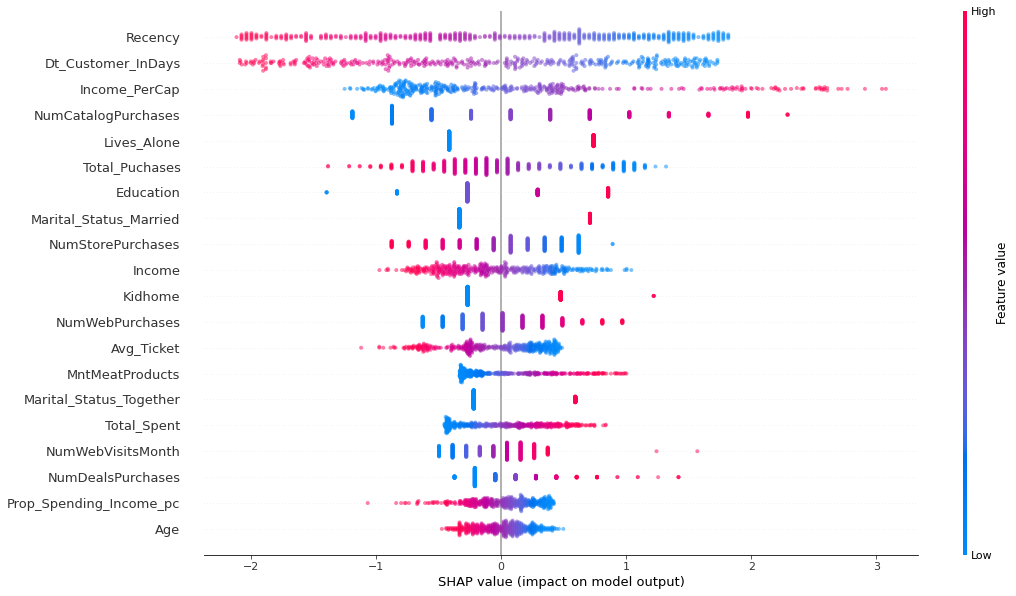

In [169]:
# Plotting Feature Importance graph
shap.summary_plot(shap_values.values, 
                  X_train_scaled, 
                  plot_size = (16, 10), 
                  alpha = .5)

From the plot above we can start defining the aforementioned _persona_ we are looking for selling the new device:

>**Most importantly, the best target customer is someone who purchased something from the company recently. It is also someone who might've joined the company recently. He/She has a high income (per cap), is very well educated, and tend to shop from catalog frequently. Live alone or is married (with kids), and sometimes likes to buy meat from the company's selling channels.**

Nice. We have our target customer.

But how about the values? The specific thresholds we should look for while targeting?

SHAP can also help with this task. Let's take a look how:

In [175]:
# Creating force_plot for 100 cusdtomers.
shap.initjs()

shap.force_plot(explainer.expected_value, 
                shap_values.values[:100], 
                X_test_scaled.loc[:100, :])

# plt.savefig('../images/shap_force_plot.png');

# When plotted, make sure that you have selected "Recency effects" on the menu on y axis, and also "Recency" 
# on x axis.

<img src="../images/shap_force_plot.png" width="1000" height="500">

<p><small><center><i>Note</i>: If you see two plots, one of them is a .png image for better displaying on GitHub.</center></small></p>

The x-axis of the graph shows each of the 100 customers (data entries) selected for the plot. The y-axis shows the `shap_effect`, that is, how much the feature `Recency` forced the customers towards a class (higher `shap_values` force entry towards `1` class, the customers who've bought the device). The x-axis shows the areas where a customer might be more prone to buy the device.

One area interesting to look is between `-0.22` and `0.471`. For this range, the algorithm suggests that the datapoint (the customers) is a good target.

Now, let's aknowledge some limitations while using `shap`, two different scalers and a Logistic Regression estimator:

**We cannot read it from right away.** These values are off human comprehention: what does SHAP effect on `Recency` $ = -0.22$ even mean?

For that we would have to get a long way back home:

- Revert shap with specific formula;
- Revert Logistical Regression with $exp$ function;
- Revert RobustScaler for features with outliers; and finally
- Revert StandScaler for features withoud outliers.

Yeah, we are not in Kansas anymore.

Such task is effectively achivable but we'll be leaving it for further analysis, another day.

Before packing it up and preparing a presentation for CMO, we still haven't seen how our chosen model performs in the wild. Our never seen `X_test` dataset is some line of code away of telling us the truth: was all this work worth it?

Well, we do not need a to look at the results to answer this last question:

From this simple dataset we:

- Cleaned our data;
- Discovered with sampling;
- Found out issued with ambiguous variables definition;
- Discovered that most customers on the first dataset never picked up the phone, and therefore they did not know the device being advertised.
- Analyzed Both datasets: one with total customers and other with exposed customers and found out that even better than modelling, selecting the right object of research made all the difference;
- Tested 8 models;
- Discovered the best _persona_ for the marketing campaign.

So many room for improvements, but at least we are plenty aware of them. After all, data Science is a working in progress. 

**Withoud further due, let's get those numbers:**

In [164]:
# Classification report on X_test
y_test_pred = log_model.best_estimator_.predict(X_test_scaled)

In [165]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78        59
           1       0.80      0.78      0.79        63

    accuracy                           0.79       122
   macro avg       0.79      0.79      0.79       122
weighted avg       0.79      0.79      0.79       122



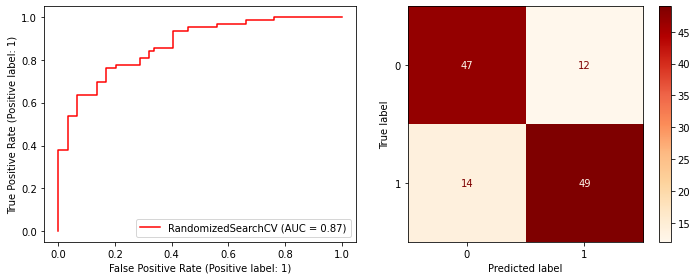

In [218]:
# Plotting AUC and Confusion Matrix side by side
fig, ax = plt.subplots(1, 2, figsize = (10, 4))

# AUC Plot
plot_roc_curve(log_model, X_test_scaled, y_test, ax = ax[0], color = 'red')

# Confusion Matrix
plot_confusion_matrix(log_model, X_test_scaled, y_test, cmap='OrRd', ax = ax[1])
plt.tight_layout()

**Our model holds its predicting**.

In the future, we may want to analyze its statistical attributes. But now, we've simulated it in prediction it seems alright.

It is importanto to remember though:

Our model was sampled from a specific temporal cut. **So we can be sure of its metrics only for customers within this temporal cut.** Nonetheless, it is a good model!

Before wrapping it all up, we still have some business questions to answer:

In [242]:
total_camp_cost = 6720
total_customers = 2240

total_customers_accepted_offer = 2240 * 0.15

camp_cost_per_customer = total_camp_cost / total_customers
camp_cost_per_customer

3.0

In [244]:
total_revenue = 3674
device_cost = round(total_revenue / total_customers_accepted_offer, 2)
device_cost

10.93

In [261]:
model_profit_per_customer = ((49 * (device_cost - camp_cost_per_customer)) - (12 * camp_cost_per_customer) )/ 61
round(model_profit_per_customer, 2)

5.78

For comparison, if we target 2,240 customers predicted as buyer (`1`) by the model, we should expected a total profit of:

In [253]:
2240 * 5.77

12924.8

The finantial impact of our model, compared to the sample campaign is:

In [254]:
sample_profit = -3046
model_profit = 2240 * 5.77

In [255]:
abs(sample_profit) + model_profit

15970.8

Targeting 10,000 customers per month:

In [262]:
round(30_000 * model_profit_per_customer, 2)

173395.08

**Our recommendation is that apart from the phone calls, the company should target customers via other channels, such as online advertisement.**

Nonetheless, when enought new data is available, we should perform another analysis, considering whichever channels have been selected as marketing media as a predictive feature.

---------------------